In [1]:

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)


In [9]:
df_11=pd.read_csv('Seoul_full.csv')

In [10]:
df_22=pd.read_csv('Seoul_full_test.csv')

In [11]:
dtypes = df_11.dtypes
encoders = {}
for column in df_11.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_11[column])
        encoders[column] = encoder
        
df_11_num = df_11.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_11_num[column] = encoder.transform(df_11[column])

dtypes = df_22.dtypes
encoders = {}
for column in df_22.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_22[column])
        encoders[column] = encoder
        
df_22_num = df_22.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_22_num[column] = encoder.transform(df_22[column])

In [12]:
y_train=df_11_num.loc[:,'이용금액']
X_train=df_11_num.loc[:,df_11_num.columns !='이용금액']

y_test=df_22_num.loc[:,'이용금액']
X_test=df_22_num.loc[:,df_22_num.columns !='이용금액']

In [13]:
X=pd.concat([X_train,X_test])
y=pd.concat([y_train,y_test])

In [14]:
model = RandomForestRegressor(n_estimators=400, min_samples_split=3)

In [15]:
model.fit(X = X_train, y = y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=400)

In [28]:
mse = mean_squared_error(y_test, model.predict(X_test))
print('mse=', mse)


mse= 1043638331058207.9


In [16]:
mse = mean_squared_error(y_test, model.predict(X_test))
print('mse=', mse)

mse= 1160419445845892.8


* RMSE=34,064,929.85

In [17]:
import pandas as pd
df = pd.DataFrame({'y_true':y_test, 'y_pred':model.predict(X_test)})
cor = df['y_true'].corr(df['y_pred'])

In [18]:
cor

0.9959366331781339

In [19]:
imp = model.feature_importances_

In [20]:
len(imp)

10

In [22]:
colnames=X_train.columns.tolist()

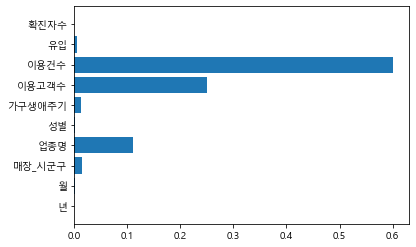

In [23]:
import matplotlib.pyplot as plt
plt.barh(range(10), imp) # (x, y) # 중요도 (y에 얼마나 영향을 미치는지)
plt.yticks(range(10), colnames);# 축 이름

In [15]:
df_11.to_csv('Seoul_corona_1.csv',index=False)